# Collaboration and Competition

---

In this notebook, we will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import copy
import inspect
import time
from collections import namedtuple, deque

import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Check Progress
from tensorboardX import SummaryWriter
import progressbar as pb
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux_NoVis/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print (brain)

Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(5):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    j = 0
    while True:
        j += 1
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        # print('Rewards from step {}: {:.2f},{:.2f}'.format(i, rewards[0], rewards[1]))
        dones = env_info.local_done                        # see if episode finished
        scores += rewards                                  # update the score (for each agent)
        # print('\t {:.2f},{:.2f}'.format( scores[0],scores[1]))
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {:.4f}'.format(i, np.max(scores)))
    # print(actions)

Score (max over agents) from episode 0: 0.0000
Score (max over agents) from episode 1: 0.0000
Score (max over agents) from episode 2: 0.0000
Score (max over agents) from episode 3: 0.1000
Score (max over agents) from episode 4: 0.0000


When finished, you can close the environment.

# Training 

###  Local Libraries
- Multi-Agent Actor-Critic Deep Deterministic Policy from **maddpg.py** imports single agents from **ddpg.py** and eploratory noise process from **OUNoise.py**  
- Experiences are stored adn sampled from **replaybuffer.py**
- Other utilies functions imported from **utilities.py**

In [6]:
# Multi-Agent
from maddpg import MADDPG
# Replay Buffer
from replaybuffer import ReplayBuffer
# Utilities
from utilities import seeding

### Config

In [7]:
    # Target Reward
    tgt_score = 0.5
    # Device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # Seed
    seed = 2
    seeding(seed)
    # Model Architecture
    # Actor
    hidden_in_actor = 256
    hidden_out_actor = 128
    lr_actor = 1e-4
    # Critic
    hidden_in_critic = 256
    hidden_out_critic = 128
    lr_critic = 3e-4
    weight_decay_critic = 0
    # Episodes
    number_of_episodes = 10000
    episode_length = 2000
    # Buffer
    buffer_size = int(1e6)
    batchsize = 512
    # Agent Update Frequency
    episode_per_update = 1
    # Rewards Discounts Factor
    discount_factor = 1
    # Soft Update Weight
    tau = 0.02
    # Noise Process
    noise_factor = 2
    noise_reduction = 0.9999
    noise_floor = 0.1
    # Window
    win_len = 100
    # Save Frequency
    save_interval = 200
    # Logger
    log_path = os.getcwd()+"/log"
    logger = SummaryWriter(log_dir=log_path)
    # Model Directory
    model_dir = os.getcwd()+"/model_dir"
    os.makedirs(model_dir, exist_ok=True)
    # Load Saved Model
    load_model = False


### Load Environment

In [8]:
    # env = UnityEnvironment(file_name="./Tennis_Linux_NoVis/Tennis.x86_64")
    # Get brain
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    print('Brain Name:', brain_name)
    # Reset the environment
    env_info = env.reset(train_mode=True)[brain_name]
    # Number of Agents
    num_agents = len(env_info.agents)
    print('Number of agents:', num_agents)
    # size of each action
    action_size = brain.vector_action_space_size
    print('Size of each action:', action_size)
    # examine the state space
    states = env_info.vector_observations
    state_size = states.shape[1]
    print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))


Brain Name: TennisBrain
Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24


 ### Multi Agent

In [9]:
    maddpg = MADDPG(state_size, action_size, num_agents,
                    hidden_in_actor, hidden_out_actor, lr_actor,
                    hidden_in_critic, hidden_out_critic, lr_critic, weight_decay_critic,
                    discount_factor, tau, seed, device)

    if load_model:
        load_dict_list = torch.load(os.path.join(model_dir, 'episode-saved.pt'))
        for i in range(num_agents):
            maddpg.maddpg_agent[i].actor.load_state_dict(load_dict_list[i]['actor_params'])
            maddpg.maddpg_agent[i].actor_optimizer.load_state_dict(load_dict_list[i]['actor_optim_params'])
            maddpg.maddpg_agent[i].critic.load_state_dict(load_dict_list[i]['critic_params'])
            maddpg.maddpg_agent[i].critic_optimizer.load_state_dict(load_dict_list[i]['critic_optim_params'])


 ### Replay Buffer

In [10]:
rebuffer = ReplayBuffer(buffer_size, seed, device)

 ## TRAINING LOOP

### Show Progressbar

In [11]:
    widget = ['episode: ', pb.Counter(), '/', str(number_of_episodes), ' ',
              pb.Percentage(), ' ', pb.ETA(), ' ', pb.Bar(marker=pb.RotatingMarker()), ' ']
    timer = pb.ProgressBar(widgets=widget, maxval=number_of_episodes).start()
    start = time.time()


### PLAY and LEARN

In [12]:
    # initialize scores
    scores_history = []
    scores_window = deque(maxlen=save_interval)

    # i_episode = 0
    for i_episode in range(number_of_episodes):
        timer.update(i_episode)

        # Reset Environmet
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        scores = np.zeros(num_agents)

        # Reset Agent
        maddpg.reset()

        # episode_t = 0
        for episode_t in range(episode_length):

            # Explore with decaying noise factor
            actions = maddpg.act(states, noise_factor=noise_factor)
            env_info = env.step(actions)[brain_name]             # Environment reacts
            next_states = env_info.vector_observations           # get the next states
            rewards = env_info.rewards                           # get the rewards
            dones = env_info.local_done                          # see if episode has finished

            ###################
            # Save Experience #
            ###################
            rebuffer.add(states, actions, rewards, next_states, dones)

            scores += rewards
            states = next_states

            if any(dones):
                break

        scores_history.append(np.max(scores))       # save most recent score
        scores_window.append(np.max(scores))        # save most recent score
        avg_rewards = np.mean(scores_window)
        noise_factor = max(noise_floor, noise_factor*noise_reduction)    # Reduce Noise Factor

        #########
        # LEARN #
        #########
        # Update Every episode_per_update
        if len(rebuffer) > batchsize and i_episode % episode_per_update == 0:
            for a_i in range(num_agents):
                samples = rebuffer.sample(batchsize)
                maddpg.update(samples, a_i, logger)
            # Soft Update
            maddpg.update_targets()

        ##################
        # Track Progress #
        ##################
        if i_episode % save_interval == 0 or i_episode == number_of_episodes-1:
            logger.add_scalars('rewards', {'Avg Reward': avg_rewards, 'Noise Factor': noise_factor}, i_episode)
            print('\nElapsed time {:.1f} \t Update Count {} \t Last Episode t {}'.format((time.time() - start)/60, maddpg.update_count, episode_t),
                  '\nEpisode {} \tAverage Score: {:.2f} \tNoise Factor {:2f}'.format(i_episode, avg_rewards, noise_factor), end="\n")

        ##############
        # Save Model #
        ##############
        save_info = ((i_episode) % save_interval == 0 or i_episode == (number_of_episodes-1))
        if save_info:
            save_dict_list = []
            for i in range(num_agents):
                save_dict = {'actor_params': maddpg.maddpg_agent[i].actor.state_dict(),
                             'actor_optim_params': maddpg.maddpg_agent[i].actor_optimizer.state_dict(),
                             'critic_params': maddpg.maddpg_agent[i].critic.state_dict(),
                             'critic_optim_params': maddpg.maddpg_agent[i].critic_optimizer.state_dict()}
                save_dict_list.append(save_dict)
            torch.save(save_dict_list, os.path.join(model_dir, 'episode-Latest.pt'))

            pd.Series(scores_history).to_csv(os.path.join(model_dir, "scores.csv"))

            # plot the scores
            rolling_mean = pd.Series(scores_history).rolling(win_len).mean()
            fig = plt.figure()
            # ax = fig.add_subplot(111)
            plt.plot(np.arange(len(scores_history)), scores_history)
            plt.axhline(y=tgt_score, color='r', linestyle='dashed')
            plt.plot(rolling_mean, lw=3)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            # plt.show()
            fig.savefig(os.path.join(model_dir, 'Average_Score.pdf'))
            fig.savefig(os.path.join(model_dir, 'Average_Score.jpg'))
            plt.close()

        if (avg_rewards > tgt_score * 3) or i_episode == (number_of_episodes-1):
            logger.add_scalars('rewards', {'Avg Reward': avg_rewards, 'Noise Factor': noise_factor}, i_episode)
            print('\nElapsed time {:.1f} \t Update Count {} \t Last Episode t {}'.format((time.time() - start)/60, maddpg.update_count, episode_t),
                  '\nEpisode {} \tAverage Score: {:.2f} \tNoise Factor {:2f}'.format(i_episode, avg_rewards, noise_factor), end="\n")
            break

    # env.close()
    logger.close()
    timer.finish()



Elapsed time 0.0 	 Update Count 0 	 Last Episode t 13 
Episode 0 	Average Score: 0.00 	Noise Factor 1.999800



Elapsed time 0.4 	 Update Count 170 	 Last Episode t 13 
Episode 200 	Average Score: 0.01 	Noise Factor 1.960199



Elapsed time 0.7 	 Update Count 370 	 Last Episode t 14 
Episode 400 	Average Score: 0.00 	Noise Factor 1.921383



Elapsed time 1.0 	 Update Count 570 	 Last Episode t 13 
Episode 600 	Average Score: 0.01 	Noise Factor 1.883335



Elapsed time 1.4 	 Update Count 770 	 Last Episode t 14 
Episode 800 	Average Score: 0.00 	Noise Factor 1.846041



Elapsed time 1.7 	 Update Count 970 	 Last Episode t 13 
Episode 1000 	Average Score: 0.00 	Noise Factor 1.809485



Elapsed time 2.1 	 Update Count 1170 	 Last Episode t 13 
Episode 1200 	Average Score: 0.00 	Noise Factor 1.773653



Elapsed time 2.5 	 Update Count 1370 	 Last Episode t 13 
Episode 1400 	Average Score: 0.02 	Noise Factor 1.738530



Elapsed time 2.9 	 Update Count 1570 	 Last Episode t 14 
Episode 1600 	Average Score: 0.05 	Noise Factor 1.704104



Elapsed time 3.4 	 Update Count 1770 	 Last Episode t 13 
Episode 1800 	Average Score: 0.06 	Noise Factor 1.670358



Elapsed time 3.9 	 Update Count 1970 	 Last Episode t 29 
Episode 2000 	Average Score: 0.07 	Noise Factor 1.637281



Elapsed time 4.5 	 Update Count 2170 	 Last Episode t 29 
Episode 2200 	Average Score: 0.08 	Noise Factor 1.604859



Elapsed time 5.0 	 Update Count 2370 	 Last Episode t 30 
Episode 2400 	Average Score: 0.08 	Noise Factor 1.573080



Elapsed time 5.6 	 Update Count 2570 	 Last Episode t 53 
Episode 2600 	Average Score: 0.08 	Noise Factor 1.541929



Elapsed time 6.1 	 Update Count 2770 	 Last Episode t 29 
Episode 2800 	Average Score: 0.08 	Noise Factor 1.511395



Elapsed time 6.7 	 Update Count 2970 	 Last Episode t 13 
Episode 3000 	Average Score: 0.08 	Noise Factor 1.481466



Elapsed time 7.3 	 Update Count 3170 	 Last Episode t 30 
Episode 3200 	Average Score: 0.09 	Noise Factor 1.452130



Elapsed time 7.9 	 Update Count 3370 	 Last Episode t 13 
Episode 3400 	Average Score: 0.09 	Noise Factor 1.423374



Elapsed time 8.5 	 Update Count 3570 	 Last Episode t 12 
Episode 3600 	Average Score: 0.09 	Noise Factor 1.395188



Elapsed time 9.1 	 Update Count 3770 	 Last Episode t 43 
Episode 3800 	Average Score: 0.10 	Noise Factor 1.367560



Elapsed time 9.8 	 Update Count 3970 	 Last Episode t 52 
Episode 4000 	Average Score: 0.10 	Noise Factor 1.340479



Elapsed time 10.5 	 Update Count 4170 	 Last Episode t 29 
Episode 4200 	Average Score: 0.10 	Noise Factor 1.313935



Elapsed time 11.1 	 Update Count 4370 	 Last Episode t 30 
Episode 4400 	Average Score: 0.09 	Noise Factor 1.287916



Elapsed time 11.8 	 Update Count 4570 	 Last Episode t 87 
Episode 4600 	Average Score: 0.09 	Noise Factor 1.262412



Elapsed time 12.5 	 Update Count 4770 	 Last Episode t 70 
Episode 4800 	Average Score: 0.10 	Noise Factor 1.237413



Elapsed time 13.3 	 Update Count 4970 	 Last Episode t 51 
Episode 5000 	Average Score: 0.10 	Noise Factor 1.212910



Elapsed time 14.1 	 Update Count 5170 	 Last Episode t 13 
Episode 5200 	Average Score: 0.12 	Noise Factor 1.188891



Elapsed time 15.1 	 Update Count 5370 	 Last Episode t 86 
Episode 5400 	Average Score: 0.14 	Noise Factor 1.165348



Elapsed time 16.2 	 Update Count 5570 	 Last Episode t 29 
Episode 5600 	Average Score: 0.16 	Noise Factor 1.142272



Elapsed time 17.1 	 Update Count 5770 	 Last Episode t 13 
Episode 5800 	Average Score: 0.14 	Noise Factor 1.119652



Elapsed time 18.5 	 Update Count 5970 	 Last Episode t 61 
Episode 6000 	Average Score: 0.19 	Noise Factor 1.097481



Elapsed time 19.6 	 Update Count 6170 	 Last Episode t 169 
Episode 6200 	Average Score: 0.17 	Noise Factor 1.075748



Elapsed time 20.6 	 Update Count 6370 	 Last Episode t 29 
Episode 6400 	Average Score: 0.15 	Noise Factor 1.054446



Elapsed time 21.9 	 Update Count 6570 	 Last Episode t 30 
Episode 6600 	Average Score: 0.20 	Noise Factor 1.033565



Elapsed time 23.2 	 Update Count 6770 	 Last Episode t 34 
Episode 6800 	Average Score: 0.20 	Noise Factor 1.013098



Elapsed time 24.7 	 Update Count 6970 	 Last Episode t 54 
Episode 7000 	Average Score: 0.23 	Noise Factor 0.993037



Elapsed time 26.1 	 Update Count 7170 	 Last Episode t 29 
Episode 7200 	Average Score: 0.24 	Noise Factor 0.973372



Elapsed time 27.7 	 Update Count 7370 	 Last Episode t 140 
Episode 7400 	Average Score: 0.25 	Noise Factor 0.954097



Elapsed time 29.8 	 Update Count 7570 	 Last Episode t 178 
Episode 7600 	Average Score: 0.34 	Noise Factor 0.935204



Elapsed time 32.5 	 Update Count 7770 	 Last Episode t 164 
Episode 7800 	Average Score: 0.43 	Noise Factor 0.916685



Elapsed time 35.2 	 Update Count 7970 	 Last Episode t 29 
Episode 8000 	Average Score: 0.46 	Noise Factor 0.898532



Elapsed time 38.6 	 Update Count 8170 	 Last Episode t 159 
Episode 8200 	Average Score: 0.58 	Noise Factor 0.880739



Elapsed time 41.9 	 Update Count 8370 	 Last Episode t 709 
Episode 8400 	Average Score: 0.54 	Noise Factor 0.863298



Elapsed time 45.3 	 Update Count 8570 	 Last Episode t 119 
Episode 8600 	Average Score: 0.57 	Noise Factor 0.846203



Elapsed time 48.9 	 Update Count 8770 	 Last Episode t 29 
Episode 8800 	Average Score: 0.61 	Noise Factor 0.829446



Elapsed time 52.4 	 Update Count 8970 	 Last Episode t 279 
Episode 9000 	Average Score: 0.58 	Noise Factor 0.813021



Elapsed time 56.5 	 Update Count 9170 	 Last Episode t 89 
Episode 9200 	Average Score: 0.70 	Noise Factor 0.796922



Elapsed time 60.7 	 Update Count 9370 	 Last Episode t 76 
Episode 9400 	Average Score: 0.72 	Noise Factor 0.781141



Elapsed time 65.5 	 Update Count 9570 	 Last Episode t 18 
Episode 9600 	Average Score: 0.81 	Noise Factor 0.765672



Elapsed time 70.8 	 Update Count 9770 	 Last Episode t 140 
Episode 9800 	Average Score: 0.92 	Noise Factor 0.750510



Elapsed time 75.7 	 Update Count 9969 	 Last Episode t 36 
Episode 9999 	Average Score: 0.83 	Noise Factor 0.735722

Elapsed time 75.7 	 Update Count 9969 	 Last Episode t 36 
Episode 9999 	Average Score: 0.83 	Noise Factor 0.735722


### Check Score

In [13]:
scores_history = pd.read_csv(os.path.join(model_dir, "scores.csv"), index_col=0, header=None, names =['Score'])
scores_history.tail()

,Score
9995.0,0.09
9996.0,0.39
9997.0,0.10
9998.0,2.60
9999.0,0.10


In [14]:
rolling_mean = scores_history.rolling(win_len).mean()
rolling_mean.tail()

,Score
9995.0,0.8507
9996.0,0.8446
9997.0,0.8266
9998.0,0.8366
9999.0,0.8116


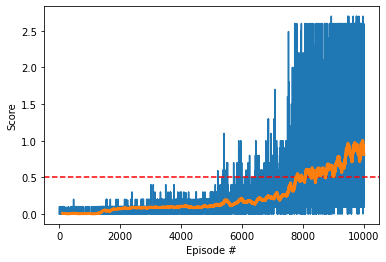

In [15]:
# plot the scores
fig = plt.figure()
# ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_history)), scores_history)
plt.axhline(y=tgt_score, color='r', linestyle='dashed')
plt.plot(rolling_mean, lw=3)
plt.ylabel('Score')
plt.xlabel('Episode #')
# plt.show()
fig.savefig(os.path.join(model_dir, 'Average_Score_Final.pdf'))
fig.savefig(os.path.join(model_dir, 'Average_Score_Final.jpg'))

## PLAY SMART AGENT

In [16]:
load_model=True
if load_model:
    load_dict_list = torch.load(os.path.join(model_dir, 'episode-Latest.pt'))
    for i in range(num_agents):
        maddpg.maddpg_agent[i].actor.load_state_dict(load_dict_list[i]['actor_params'])
        maddpg.maddpg_agent[i].actor_optimizer.load_state_dict(load_dict_list[i]['actor_optim_params'])
        maddpg.maddpg_agent[i].critic.load_state_dict(load_dict_list[i]['critic_params'])
        maddpg.maddpg_agent[i].critic_optimizer.load_state_dict(load_dict_list[i]['critic_optim_params'])

In [17]:
# env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")
# brain_name = env.brain_names[0]
# brain = env.brains[brain_name]

In [18]:
## Play 
for i in range(3):
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    scores = np.zeros(num_agents)
    for j in range(200):
        actions = maddpg.act(states)
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations    # get the next state
        rewards = env_info.rewards                    # get the reward
        dones = env_info.local_done                   # see if episode has finished
        scores += rewards                             # update the score
        states = next_states                          # roll over the state to next time step
        if np.any(dones):
            break
    print('Score (max over agents) from episode {}: {:.4f}'.format(i, np.max(scores)))


Score (max over agents) from episode 0: 0.2000
Score (max over agents) from episode 1: 0.3000
Score (max over agents) from episode 2: 0.0900


In [19]:
env.close()